# US Accidents Exploratory Data Analysis

### Importing few libraries

In [1]:
import pandas as pd
pd.set_option('display.max_columns',None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Loading the data

In [2]:
data = pd.read_csv("D:/Softwares/DS/Project/US Accident/archive/US_Accidents_Dec21_updated.csv")

### Data Preparation
+ Look at some information about the data and the columns
+ Deal with missing values or incorrect values

In [3]:
# To view top 5 records of the data

data.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45217,US,US/Eastern,KLUK,2016-02-08 07:53:00,37.0,29.8,93.0,29.69,10.0,WSW,10.4,0.01,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


In [4]:
# Shape of the data (no. of rows, no. of columns)

data.shape

# (rows=2845342, columns=47)

(2845342, 47)

In [5]:
# Getting all the columns present in the data

data.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [6]:
# Information about the data types of columns present in the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [7]:
# Getting statistical summary (works only with column having numerical data type)

data.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [8]:
# Getting the count of numeric columns 

numerics = ['int16', 'int32', 'int64','float16', 'float32', 'float64' ]
numeric_data = data.select_dtypes(include=numerics)
len(numeric_data.columns)

# (Data has 14 numeric columns)

14

In [9]:
# Checking missing values --> per columns count of missing value

missing_values = data.isnull().sum().sort_values(ascending=False)

In [10]:
# Keeping only those columns which has missing value

missing_values[missing_values != 0]

Number                   1743911
Precipitation(in)         549458
Wind_Chill(F)             469643
Wind_Speed(mph)           157944
Wind_Direction             73775
Humidity(%)                73092
Weather_Condition          70636
Visibility(mi)             70546
Temperature(F)             69274
Pressure(in)               59200
Weather_Timestamp          50736
Airport_Code                9549
Timezone                    3659
Nautical_Twilight           2867
Civil_Twilight              2867
Sunrise_Sunset              2867
Astronomical_Twilight       2867
Zipcode                     1319
City                         137
Street                         2
dtype: int64

<AxesSubplot:>

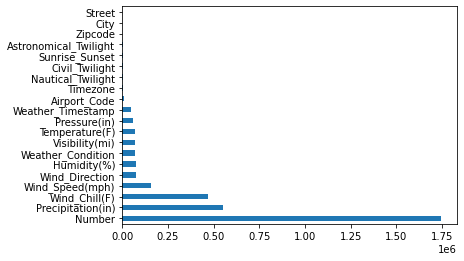

In [11]:
# Plotting above missing values

missing_values[missing_values != 0].plot(kind='barh')

# (From Street to Airport Code values are rarely missing but From Weather Timestamp onwards values are highly missing)
# (If a data has something which is missing more than half of the time then it's probably not that useful because it's anyway 
# not going to apply to half of the data. So we can choose to skip this kind of columns)

In [12]:
data.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

### Exploratory Data Analysis And Visualization


#### Exploring City column

In [13]:

cities = data['City'].unique()
len(cities)

11682

In [14]:
# Getting value counts of each cities

cities_by_accident = data['City'].value_counts()
cities_by_accident

Miami                 106966
Los Angeles            68956
Orlando                54691
Dallas                 41979
Houston                39448
                       ...  
Mc Gill                    1
Stroud                     1
Vermontville               1
Louisville Central         1
Munroe Falls               1
Name: City, Length: 11681, dtype: int64

In [15]:
# Getting top 20 cities 

top20_cities = cities_by_accident[:20]
top20_cities

Miami           106966
Los Angeles      68956
Orlando          54691
Dallas           41979
Houston          39448
Charlotte        33152
Sacramento       32559
San Diego        26627
Raleigh          22840
Minneapolis      22768
Portland         20944
Nashville        20267
Austin           18301
Baton Rouge      18182
Phoenix          17143
Saint Paul       16869
New Orleans      16251
Atlanta          15622
Jacksonville     14967
Richmond         14349
Name: City, dtype: int64

<AxesSubplot:>

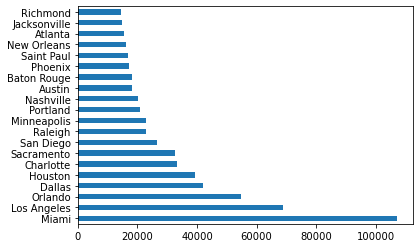

In [16]:
top20_cities.plot(kind='barh')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City', ylabel='Density'>

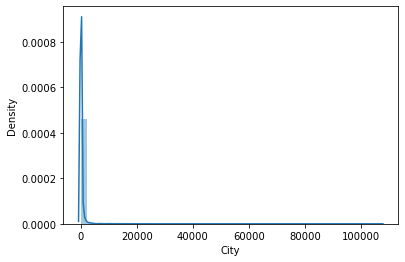

In [17]:
# Checking distribution of Cities

sns.distplot(cities_by_accident)

# (Here it can be seen that most of the cities have few accidents)
# (Most cities have less than 2000 acidents)

In [18]:
# Forming two variables with namely high and low accidents

high_accident_cities = cities_by_accident[cities_by_accident >= 1000]
low_accident_cities = cities_by_accident[cities_by_accident < 1000]

In [19]:
len(high_accident_cities) / len(cities)

# (4% cities have more than 1000 accidents)

0.04245848313644924

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City', ylabel='Density'>

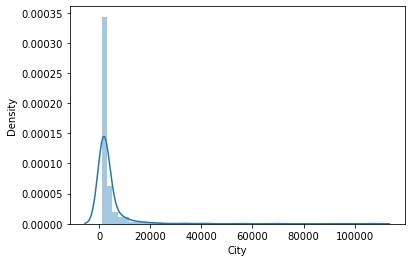

In [20]:
# Plotting high_accident_cities

sns.distplot(high_accident_cities)

<AxesSubplot:xlabel='City', ylabel='Count'>

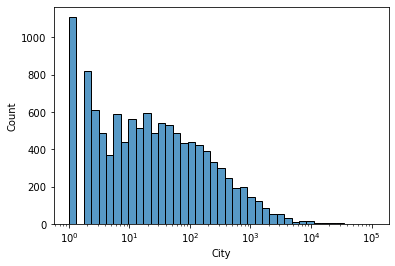

In [21]:
# Plotting the above using Logarithmic scale for better distribution

sns.histplot(cities_by_accident, log_scale=True)

# (Most of the cities have one accidents followed by b/w 1 to 100)

In [22]:
cities_by_accident[cities_by_accident == 1]

# (1110 cities have reported just 1 accident)

Scotts Mills          1
East Norwich          1
Oglesby               1
Waterman              1
Fort Ripley city      1
                     ..
Mc Gill               1
Stroud                1
Vermontville          1
Louisville Central    1
Munroe Falls          1
Name: City, Length: 1110, dtype: int64

#### Exploring State Column

In [23]:
# Getting count of each state

states_by_accident = data['State'].value_counts()
states_by_accident

CA    795868
FL    401388
TX    149037
OR    126341
VA    113535
NY    108049
PA     99975
MN     97185
NC     91362
SC     89216
MD     65085
AZ     56504
NJ     52902
TN     52613
UT     49193
LA     47232
IL     47105
MI     43843
GA     40086
WA     32554
CT     29762
MO     29633
CO     25340
OH     24409
IN     20850
AL     19322
MT     15964
AR     10935
IA      9607
DC      9133
KS      9033
OK      8806
ID      8544
WI      7896
WV      7632
KY      6638
MA      6392
NV      6197
MS      5320
DE      4842
RI      4451
NH      3866
NE      3320
NM      2370
ND      2258
ME      2193
WY       990
VT       365
SD       201
Name: State, dtype: int64

In [24]:
# Getting total no. of states

len(data['State'].unique())

49

In [25]:
top10_states = states_by_accident[:10]
top10_states

CA    795868
FL    401388
TX    149037
OR    126341
VA    113535
NY    108049
PA     99975
MN     97185
NC     91362
SC     89216
Name: State, dtype: int64

<AxesSubplot:>

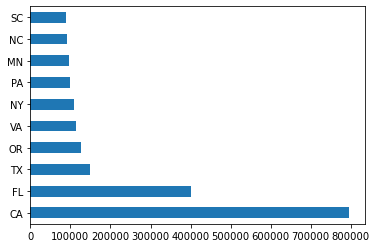

In [26]:
# Plotting top 10 states

top10_states.plot(kind='barh')

#### Exploring Start time column

In [27]:
data['Start_Time']

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:51:45
4          2016-02-08 07:53:43
                  ...         
2845337    2019-08-23 18:03:25
2845338    2019-08-23 19:11:30
2845339    2019-08-23 19:00:21
2845340    2019-08-23 19:00:21
2845341    2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: object

In [28]:
# Since this is in object so we need to convert it into date time object

data['Start_Time'] = pd.to_datetime(data['Start_Time'])
data['Start_Time']

# (Successfully converted)

0         2016-02-08 00:37:08
1         2016-02-08 05:56:20
2         2016-02-08 06:15:39
3         2016-02-08 06:51:45
4         2016-02-08 07:53:43
                  ...        
2845337   2019-08-23 18:03:25
2845338   2019-08-23 19:11:30
2845339   2019-08-23 19:00:21
2845340   2019-08-23 19:00:21
2845341   2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: datetime64[ns]

In [29]:
# Checking the 1st timestamp

data['Start_Time'][0]

Timestamp('2016-02-08 00:37:08')

##### Since this is date time data so analyzing 'Hour' section to pull insights from the data

In [30]:
data['Start_Time'][4].hour

7

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

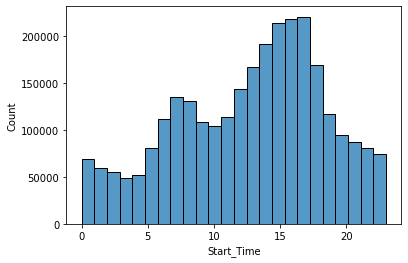

In [63]:
sns.histplot(data['Start_Time'].dt.hour, bins=24)

# (Most of the accidents happen between 3-6 pm)

##### Analyzing 'Day of the week' section to pull insights from the data

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

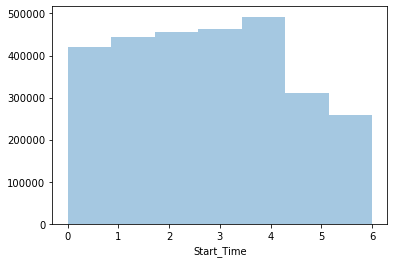

In [8]:
sns.distplot(data['Start_Time'].dt.dayofweek, bins=7, kde=False)

# (Most of the accidents occur on Friday)

##### Checking distribution for each week days

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

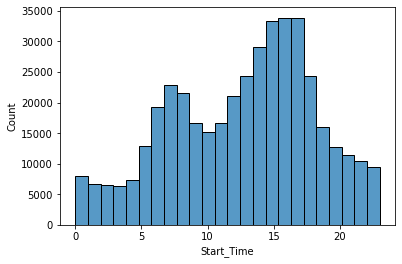

In [90]:
# Checking distribution particular for mondays

mondays_start_time = data['Start_Time'][data['Start_Time'].dt.dayofweek == 0]
mondays_start_time

sns.histplot(mondays_start_time.dt.hour, bins=24)

# (Most accidents occur from 3-6 pm on mondays)

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

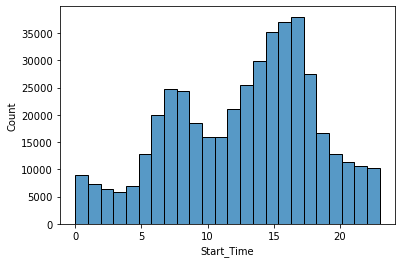

In [91]:
# Checking distribution particular for tuesdays

tuesdays_start_time = data['Start_Time'][data['Start_Time'].dt.dayofweek == 1]
tuesdays_start_time

sns.histplot(tuesdays_start_time.dt.hour, bins=24)

# (Most accidents occur from 3-6 pm on tuesdays)

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

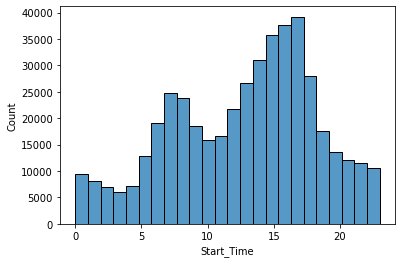

In [92]:
# Checking distribution particular for wednesdays

wednesdays_start_time = data['Start_Time'][data['Start_Time'].dt.dayofweek == 2]
wednesdays_start_time

sns.histplot(wednesdays_start_time.dt.hour, bins=24)

# (Most accidents occur from 3-6 pm on wednesdays)

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

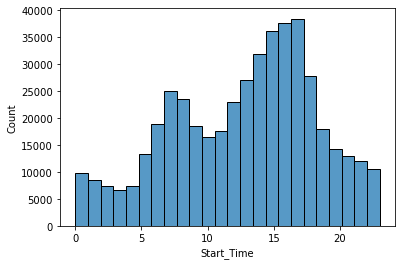

In [93]:
# Checking distribution particular for thursdays

thursdays_start_time = data['Start_Time'][data['Start_Time'].dt.dayofweek == 3]
thursdays_start_time

sns.histplot(thursdays_start_time.dt.hour, bins=24)

# (Most accidents occur from 3-6 pm on thursdays)

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

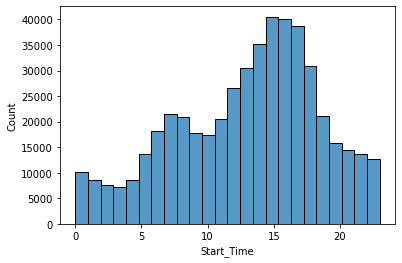

In [94]:
# Checking distribution particular for fridays

fridays_start_time = data['Start_Time'][data['Start_Time'].dt.dayofweek == 4]
fridays_start_time

sns.histplot(fridays_start_time.dt.hour, bins=24)

# (Most accidents occur from 3-6 pm on Fridays)

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

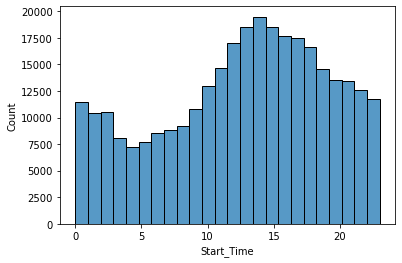

In [95]:
# Checking distribution particular for saturdays

saturdays_start_time = data['Start_Time'][data['Start_Time'].dt.dayofweek == 5]
saturdays_start_time

sns.histplot(saturdays_start_time.dt.hour, bins=24)

# (On Saturdays, mostly accidents occur b/w 12-7pm )

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

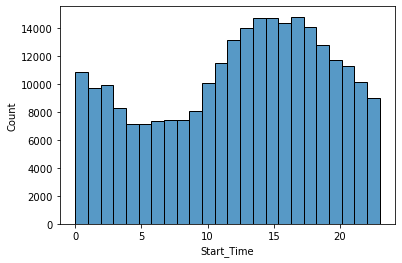

In [96]:
# Checking distribution particular for sundays

sundays_start_time = data['Start_Time'][data['Start_Time'].dt.dayofweek == 6]
sundays_start_time

sns.histplot(sundays_start_time.dt.hour, bins=24)

# (On Sundays, mostly accidents occur b/w 12-7pm )

##### Analyzing 'Month' section to pull insights from the data

<AxesSubplot:xlabel='Start_Time'>

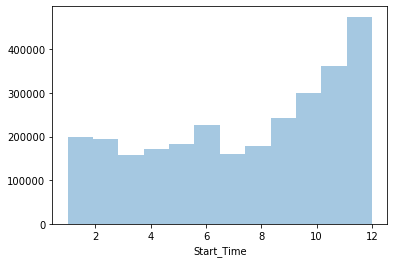

In [9]:
sns.distplot(data['Start_Time'].dt.month, bins=12, kde=False)

# (Most accidents are likely to happen in the month of December)

#### Exploring Weather Condition columns

In [39]:
data['Weather_Condition'].value_counts()[:20]

Fair                       1107194
Mostly Cloudy               363959
Cloudy                      348767
Partly Cloudy               249939
Clear                       173823
Light Rain                  128403
Overcast                     84882
Scattered Clouds             45132
Light Snow                   43752
Fog                          41226
Haze                         36354
Rain                         31044
Fair / Windy                 15195
Heavy Rain                   11824
Smoke                         7200
Light Drizzle                 7041
Thunder in the Vicinity       6944
Cloudy / Windy                6839
T-Storm                       6546
Mostly Cloudy / Windy         6297
Name: Weather_Condition, dtype: int64

<AxesSubplot:ylabel='Weather_Condition'>

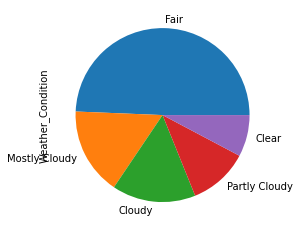

In [32]:
(data['Weather_Condition'].value_counts()[:5]).plot(kind='pie')

### Insights
+ Miami City(Florida State) has most no. of accidents followed by Los Angeles(California State).
+ State wise California has most no. of accidents.
+ -> Probablity of accidents happening in Miami is more (as per 2016-2019 data) despite having less population than Los Angeles (as per google). 
+ --> Which means Miami city is most prone to accidents in US.
+ 4% of the cities have more than 1000 yearly accidents
+ 1110 cities have reported just 1 accident
+ Most of the accidents happen between 3-6 pm (Probably because people are hurry to get back at home from office.)
+ Higher no. of the accidents occur on Friday, followed by Wed,Tue,Mon. Fewer accidents occur at weekends.
+ On Weekends the peak of accidents occur b/w 12-7pm whereas on Weekdays it occurs b/w 3-6pm .
+ Most accidents are likely to happen in the month of December.
+ Most accidents DID NOT occur when the weather was RAINY but occured when the weather was Fair.